# Top Skills for UK Analysts: An Analysis of the Current Job Market

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df = pd.read_csv('data/reed_uk_data_analyst_skills.csv')

In [46]:
print("Data shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

Data shape: (1528, 6)

First 5 rows:
                  job_title                                            job_url  \
0             Data Analyst  https://www.reed.co.uk/jobs/data-analyst/54606...   
1      Junior Data Analyst  https://www.reed.co.uk/jobs/junior-data-analys...   
2  Data Analyst Apprentice  https://www.reed.co.uk/jobs/data-analyst-appre...   
3   Principal Data Analyst  https://www.reed.co.uk/jobs/principal-data-ana...   
4  Data Analyst Apprentice  https://www.reed.co.uk/jobs/data-analyst-appre...   

                    location              job_type  \
0                     London  Permanent, full-time   
1           Chertsey, Surrey  Permanent, full-time   
2    Stafford, Staffordshire  Permanent, full-time   
3                     London  Permanent, full-time   
4  Trafford Park, Lancashire  Permanent, full-time   

                        salary                          skills  
0           Competitive salary  power bi, python, sql, tableau  
1           Competit

In [47]:
print("\nUnique job titles:\n", df['job_title'].value_counts())
print("\nUnique locations:\n", df['location'].value_counts())
print("\nUnique job types:\n", df['job_type'].value_counts())
print("\nUnique salary entries:\n", df['salary'].value_counts())

print("\nNumber of 'Not specified' entries:")
print(f"Salary: {len(df[df['salary'] == 'Not specified'])}")
print(f"Location: {len(df[df['location'] == 'Not specified'])}")
print(f"Job type: {len(df[df['job_type'] == 'Not specified'])}")


Unique job titles:
 job_title
Data Analyst                                   140
Trainee Software Developer                      99
Data Analyst Trainee                            97
Web Developer Trainee                           91
Data Science Trainee                            90
                                              ... 
Growth Analyst                                   1
Financial Planning Analyst                       1
CRM Analyst                                      1
Interim Finance Analyst                          1
Financial Planning &amp; Analysis Assistant      1
Name: count, Length: 605, dtype: int64

Unique locations:
 location
London                                460
Manchester, Lancashire                 58
Leeds, West Yorkshire                  39
Birmingham, West Midlands (County)     33
City of London, London                 24
                                     ... 
Middleton, Manchester, Lancashire       1
Tadworth, Surrey                        1
Chel

## Skills analysis

In [48]:
def split_skills(skills_text):
    return [skill.strip() for skill in str(skills_text).split(',')]

df['skills_list'] = df['skills'].apply(split_skills)
print(df[['skills', 'skills_list']].head())

                           skills                       skills_list
0  power bi, python, sql, tableau  [power bi, python, sql, tableau]
1                 excel, power bi                 [excel, power bi]
2            excel, power bi, sql            [excel, power bi, sql]
3            python, sql, tableau            [python, sql, tableau]
4                 excel, power bi                 [excel, power bi]


In [49]:
# Count occurrences of each skill
all_skills = []
for skills in df['skills_list']:
    all_skills.extend(skills)

skill_counts = Counter(all_skills)

skills_freq_df = pd.DataFrame(skill_counts.most_common(), columns=['Skill', 'Frequency'])
print(skills_freq_df)

         Skill  Frequency
0       python        818
1          sql        776
2        excel        683
3      tableau        417
4     power bi        386
5   javascript        298
6            r         75
7      powerbi         54
8          sas         46
9         java         22
10       spark         17
11      matlab         10
12         cpp          8
13        qlik          6
14       swift          5
15       scala          5


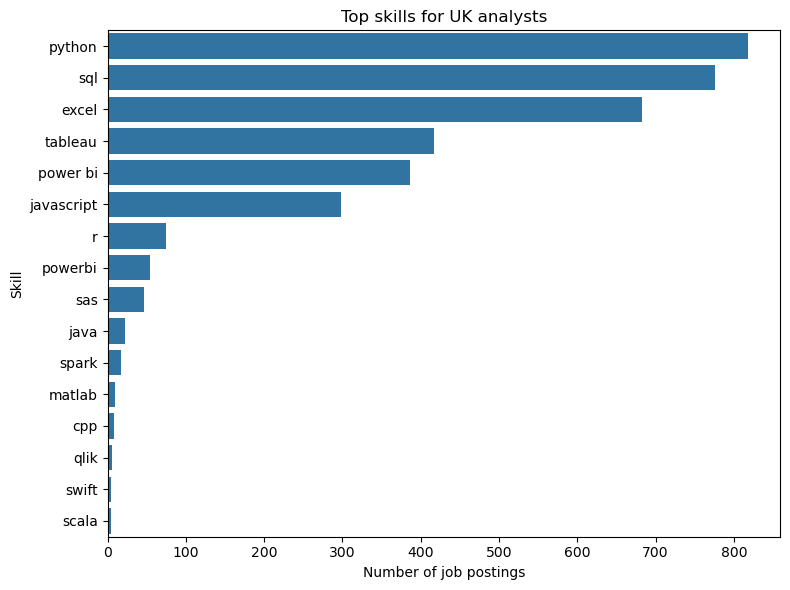

In [50]:
plt.figure(figsize=(8, 6))
sns.barplot(data=skills_freq_df, x='Frequency', y='Skill')
plt.title('Top skills for UK analysts')
plt.xlabel('Number of job postings')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

## Job type analysis

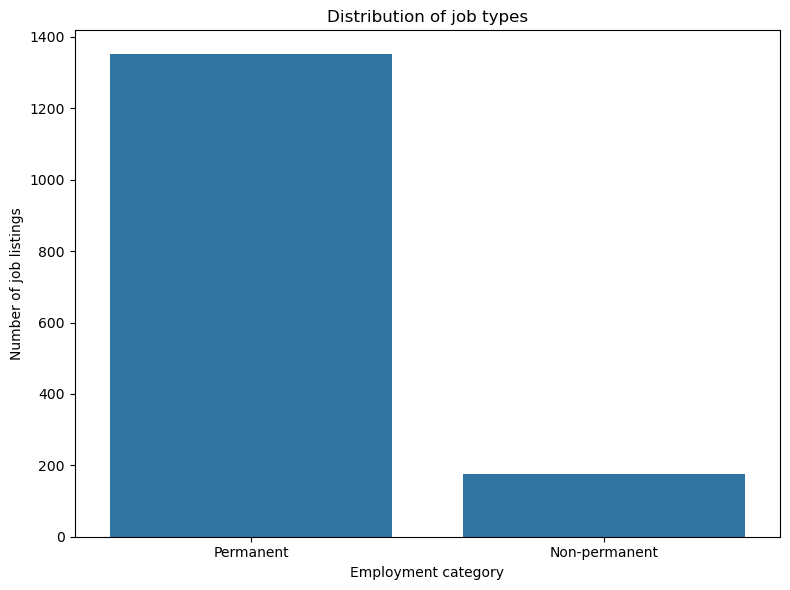

In [51]:
# Permanent vs non permanent
df['employment_category'] = df['job_type'].apply(lambda x: 'Non-permanent' if ('Contract' in x or 'Temporary' in x) else 'Permanent')

plt.figure(figsize=(8, 6))
sns.barplot(data=df['employment_category'].value_counts())
plt.title('Distribution of job types')
plt.xlabel('Employment category')
plt.ylabel('Number of job listings')
plt.tight_layout()
plt.show()